In [1]:
from fastai.vision import *

In [2]:
path = Path('/kaggle/input/')
path.ls()

[PosixPath('/kaggle/input/sample_submission_v2.csv'),
 PosixPath('/kaggle/input/test-tif-v3'),
 PosixPath('/kaggle/input/train-tif-v2'),
 PosixPath('/kaggle/input/test-jpg-v2'),
 PosixPath('/kaggle/input/test_v2_file_mapping.csv'),
 PosixPath('/kaggle/input/train-jpg'),
 PosixPath('/kaggle/input/train_v2.csv')]

In [3]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [4]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [5]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(sep=' '))

In [6]:
data = (src.transform(tfms, size=128)
        .databunch(num_workers=0).normalize(imagenet_stats))

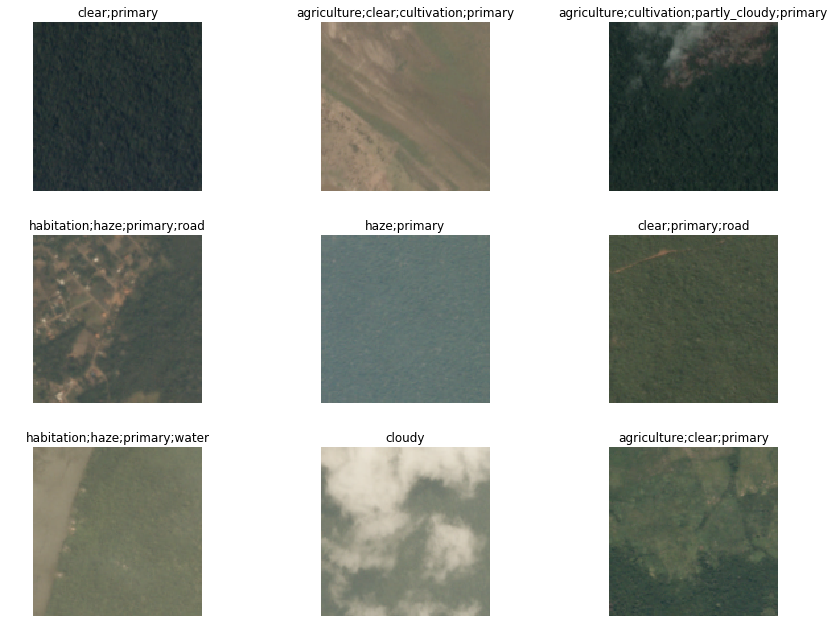

In [7]:
data.show_batch(rows=3, figsize=(12,9))

In [8]:
arch = models.resnet50

In [9]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score], model_dir='/tmp/models')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 68367750.95it/s]


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


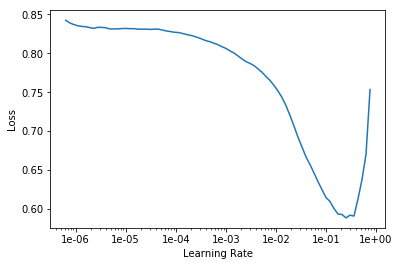

In [11]:
learn.recorder.plot()

In [12]:
lr = 0.01

In [13]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.126120,0.110069,0.941685,0.899026
2,0.113306,0.098711,0.950739,0.914410
3,0.100120,0.094480,0.954431,0.917654
4,0.095342,0.088610,0.956996,0.924309
5,0.091117,0.087600,0.956698,0.924583


In [14]:
learn.save('stage-1-rn50')

In [15]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


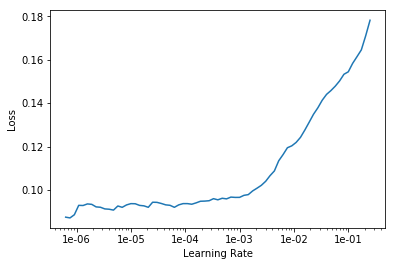

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.097189,0.092254,0.957250,0.919445
2,0.097337,0.089631,0.955761,0.923859
3,0.091739,0.086576,0.957519,0.925275
4,0.086072,0.083071,0.957752,0.928478
5,0.082657,0.082917,0.959692,0.928545


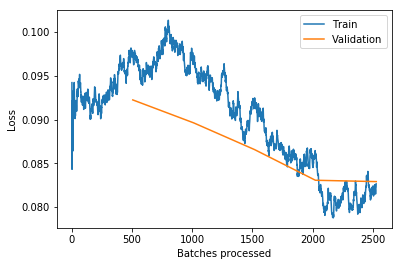

In [18]:
learn.recorder.plot_losses()